In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd 'drive/MyDrive/DD2360/Assignment4/ex_3'

/content/drive/MyDrive/DD2360/Assignment4/ex_3


In [4]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
Sun Jan  8 12:51:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |      

In [4]:
!dir

ex_3.cu     ex_3.out	    ex_3_pinned.out  ex_3_unified.out
ex_3.ipynb  ex_3_pinned.cu  ex_3_unified.cu


In [13]:
!nvcc ex_3.cu -o ex_3.out

In [7]:
!nvcc ex_3_pinned.cu -o ex_3_pinned.out

In [16]:
!nvcc ex_3_unified.cu -o ex_3_unified.out

In [14]:
!nvprof ./ex_3.out 128 128 128 128
!nvprof ./ex_3.out 256 256 256 256
!nvprof ./ex_3.out 512 512 512 512
!nvprof ./ex_3.out 1024 1024 1024 1024

Input matrix dim (128 x 128) (128 x 128) (128 x 128)
==9772== NVPROF is profiling process 9772, command: ./ex_3.out 128 128 128 128
CPU and GPU results are equal.
==9772== Profiling application: ./ex_3.out 128 128 128 128
==9772== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   52.75%  28.256us         1  28.256us  28.256us  28.256us  gemm(float*, float*, float*, int, int, int, int)
                   34.35%  18.399us         2  9.1990us  9.1200us  9.2790us  [CUDA memcpy HtoD]
                   12.90%  6.9110us         1  6.9110us  6.9110us  6.9110us  [CUDA memcpy DtoH]
      API calls:   99.52%  195.70ms         3  65.233ms  2.1890us  195.69ms  cudaMalloc
                    0.21%  405.46us         1  405.46us  405.46us  405.46us  cuDeviceTotalMem
                    0.09%  173.56us       101  1.7180us     154ns  78.938us  cuDeviceGetAttribute
                    0.09%  169.20us         3  56.400us  38.805us  89.5

In [9]:
!nvprof ./ex_3_pinned.out 128 128 128
!nvprof ./ex_3_pinned.out 256 256 256
!nvprof ./ex_3_pinned.out 512 512 512
!nvprof ./ex_3_pinned.out 1024 1024 1024

Input matrix dim (128 x 128) (128 x 128) (128 x 128)
==7979== NVPROF is profiling process 7979, command: ./ex_3_pinned.out 128 128 128
GEMM result is CORRECT
==7979== Profiling application: ./ex_3_pinned.out 128 128 128
==7979== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   63.68%  71.359us         1  71.359us  71.359us  71.359us  gemm(double*, double*, double*, int, int, int, int)
                   26.19%  29.344us         2  14.672us  13.024us  16.320us  [CUDA memcpy HtoD]
                   10.14%  11.360us         1  11.360us  11.360us  11.360us  [CUDA memcpy DtoH]
      API calls:   99.28%  201.14ms         3  67.046ms  2.7060us  201.13ms  cudaMallocHost
                    0.22%  443.71us         3  147.90us  2.7780us  435.02us  cudaFreeHost
                    0.17%  342.64us         1  342.64us  342.64us  342.64us  cuDeviceTotalMem
                    0.09%  180.96us         3  60.319us  35.452us  93.664u

In [17]:
!nvprof ./ex_3_unified.out 128 128 128 128
!nvprof ./ex_3_unified.out 256 256 256 256
!nvprof ./ex_3_unified.out 512 512 512 512
!nvprof ./ex_3_unified.out 1024 1024 1024 1024

Input matrix dim (128 x 128) (128 x 128) (128 x 128)
==12825== NVPROF is profiling process 12825, command: ./ex_3_unified.out 128 128 128 128
CPU and GPU results are equal.
==12825== Profiling application: ./ex_3_unified.out 128 128 128 128
==12825== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  28.959us         1  28.959us  28.959us  28.959us  gemm(float*, float*, float*, int, int, int, int)
      API calls:   99.40%  217.04ms         4  54.260ms  2.7570us  217.02ms  cudaMallocManaged
                    0.21%  447.78us         3  149.26us  25.622us  244.72us  cudaMemPrefetchAsync
                    0.17%  361.83us         1  361.83us  361.83us  361.83us  cuDeviceTotalMem
                    0.08%  170.34us       101  1.6860us     127ns  74.947us  cuDeviceGetAttribute
                    0.07%  159.38us         4  39.844us  9.9340us  104.00us  cudaFree
                    0.04%  85.250us         1  85.25

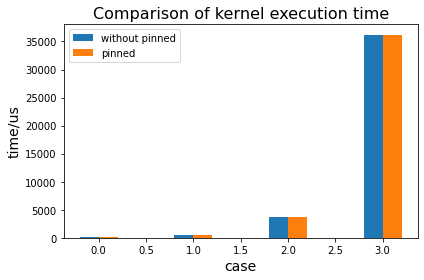

In [7]:
import matplotlib.pyplot as plt
import numpy as np
kernel_pinned = [71.359 ,537.88 ,3665.2,36237]
kernel_origin = [71.616 ,537.63 ,3665.2,36222]
labels = ['128', '256', '512', '1024']
x = np.arange(len(labels))
width = 0.2
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, kernel_origin, width, label='without pinned')
rects2 = ax.bar(x + width/2, kernel_pinned, width, label='pinned')
ax.set_ylabel('time/us', fontsize=14)
ax.set_xlabel('case', fontsize=14)
ax.set_title('Comparison of kernel execution time', fontsize=16)
ax.set_xticks(x, labels)
ax.legend()


fig.tight_layout()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
H2D_origin = [5.178 ,20.551 ,82.875]
D2H_origin = [4.269 ,16.673 ,66.055 ]
H2D_pinned = [ 1.36 ,20.551 ,82.875]
D2H_pinned = [4.269 ,16.673 ,66.055 ]
labels = ['128', '256', '512', '1024']
x = np.arange(len(labels))
width = 0.2
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, non_stream, width, label='non-stream')
rects2 = ax.bar(x + width/2, stream, width, label='4 streams')
ax.set_ylabel('time/e-03', fontsize=14)
ax.set_xlabel('case', fontsize=14)
ax.set_title('Comparison of non-stream and 4 streams', fontsize=16)
ax.set_xticks(x, labels)
ax.legend()


fig.tight_layout()